In [3]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



import matplotlib.pyplot as plt
import seaborn as sns

#Pacakages for Time series Analysis:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




In [27]:
#load Data

Eth=pd.read_csv('Ethereum Historical Data.csv') 

In [28]:
Eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 09, 2021","3,162.93","3,011.88","3,184.84","2,899.24",1.44M,5.01%
1,"Aug 08, 2021","3,012.07","3,158.30","3,188.49","2,949.66",1.25M,-4.62%
2,"Aug 07, 2021","3,158.00","2,889.58","3,169.74","2,867.58",64.84K,9.29%
3,"Aug 06, 2021","2,889.43","2,827.23","2,946.62","2,726.04",1.06M,2.20%
4,"Aug 05, 2021","2,827.21","2,725.28","2,842.95","2,533.51",1.65M,3.74%


In [29]:
Eth.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1974,"Mar 14, 2016",12.5,15.07,15.07,11.4,92.18K,-17.05%
1975,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
1976,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
1977,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%
1978,"Mar 10, 2016",11.75,11.2,11.85,11.07,0.00K,4.91%


Daily Time Series Data of the Price of Ethereum  since 2016

In [30]:
Eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1979 non-null   object
 1   Price     1979 non-null   object
 2   Open      1979 non-null   object
 3   High      1979 non-null   object
 4   Low       1979 non-null   object
 5   Vol.      1979 non-null   object
 6   Change %  1979 non-null   object
dtypes: object(7)
memory usage: 108.4+ KB


The appropriate data type must be used. There will be a conversion.

In [31]:
# Coverting the date column to a datetime format and sorting the dataframe by date
Eth['Date'] =  pd.to_datetime(Eth['Date'],infer_datetime_format=True,format='%y-%m-%d')
Eth.sort_values(by='Date',inplace=True)
Eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
1978,2016-03-10,11.75,11.2,11.85,11.07,0.00K,4.91%
1977,2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
1976,2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
1975,2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
1974,2016-03-14,12.5,15.07,15.07,11.4,92.18K,-17.05%


In [32]:
# We should change Million(M) and Thousands(K) 
Eth["Vol."] = Eth["Vol."].replace("-",np.nan)
Eth["Vol."] = (Eth["Vol."].replace(r'[KM]+', '', regex=True).astype(float) * \
              Eth["Vol."].str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
             .replace(['K','M'], [10**3, 10**6]).astype(int))


# Our columns should not contain , because python doesn't understand it as thousand parser
Eth["Price"]=Eth["Price"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
Eth["Open"]=Eth["Open"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
Eth["High"]=Eth["High"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
Eth["Low"]=Eth["Low"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
Eth["Change %"] = Eth["Change %"].str.extract("([-]?[0-9]+\.?[0-9]+)").astype("float")

In [33]:
Eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
1978,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
1977,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
1976,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
1975,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
1974,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [34]:
Eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 1978 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1979 non-null   datetime64[ns]
 1   Price     1978 non-null   float64       
 2   Open      1979 non-null   float64       
 3   High      1978 non-null   float64       
 4   Low       1973 non-null   float64       
 5   Vol.      1971 non-null   float64       
 6   Change %  1979 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.7 KB


In [36]:
#Checking for missing values

Eth.isnull().sum()

Date        0
Price       1
Open        0
High        1
Low         6
Vol.        8
Change %    0
dtype: int64

In [37]:
#Droping missing values
Eth=Eth.dropna()

In [38]:
Eth.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [40]:
Eth.shape

(1964, 7)

In [41]:
Eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
1978,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
1977,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
1976,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
1975,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
1974,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [46]:
#Changing the Volume to millions
Eth["Vol."] = Eth["Vol."] / 1e6

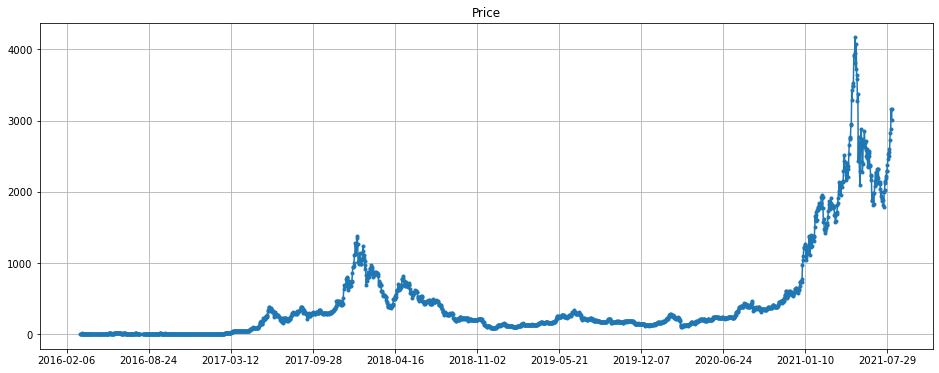

In [49]:
# plot price development
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(Eth.Date, Eth.Price, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.title('Price')
plt.grid()
plt.show()

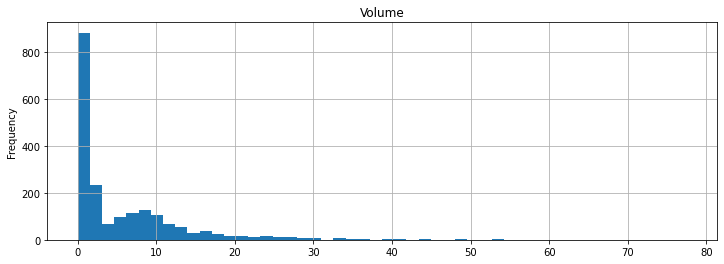

In [50]:
# distribution of volume (in mn)
plt.figure(figsize=(12,4))
Eth["Vol."].plot(kind='hist', bins=50)
plt.title('Volume')
plt.grid()
plt.show()

In [51]:
#Since there is some skewness in the data, we take the log

# add a few derived features
Eth['logPrice'] = np.log(Eth["Price"])
Eth['logChange'] = Eth.logPrice.diff()
Eth['percChange'] = Eth.Price.pct_change()

In [52]:
Eth.head()

,Date,Price,Open,High,Low,Vol.,Change %,logPrice,logChange,percChange
1978,2016-03-10,11.75,11.20,11.85,11.07,0.00000,4.91,2.463853,NaN,NaN
1977,2016-03-11,11.95,11.75,11.95,11.75,0.00018,1.70,2.480731,0.016878,0.017021
1976,2016-03-12,12.92,11.95,13.45,11.95,0.00083,8.12,2.558776,0.078045,0.081172
1975,2016-03-13,15.07,12.92,15.07,12.92,0.00130,16.64,2.712706,0.153930,0.166409
1974,2016-03-14,12.50,15.07,15.07,11.40,0.09218,-17.05,2.525729,-0.186977,-0.170537


In [56]:
vars = ['Vol.','Price','logPrice','logChange','percChange']
Eth[vars].describe()

,Vol.,Price,logPrice,logChange,percChange
count,1964.000000,1964.000000,1964.000000,1963.000000,1963.000000
mean,5.724368,460.019216,5.205160,0.002850,0.004548
std,7.983293,662.846359,1.563517,0.058398,0.058055
min,0.000000,6.700000,1.902108,-0.589639,-0.445472
25%,0.566663,123.027500,4.812408,-0.022662,-0.022407
50%,1.935000,224.400000,5.413430,0.001508,0.001509
75%,8.690000,449.590000,6.108336,0.030119,0.030577
max,77.470000,4167.780000,8.335139,0.258599,0.295115


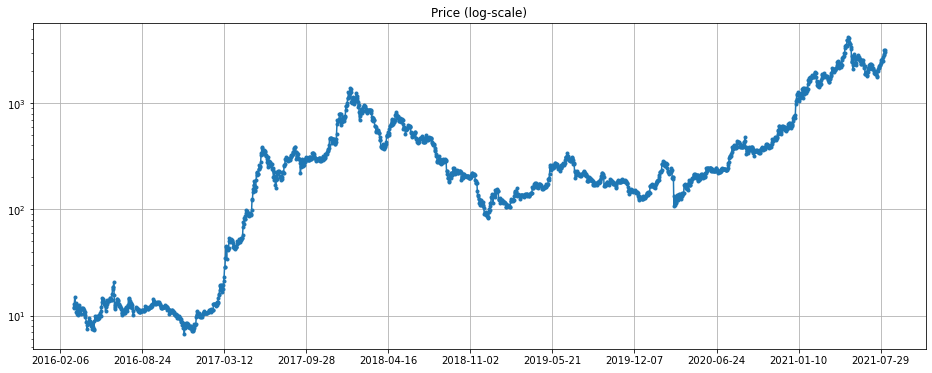

In [58]:
# plot price development - log scale
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(Eth.Date, Eth.Price, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
ax.set_yscale('log')
plt.title('Price (log-scale)')
plt.grid()
plt.show()

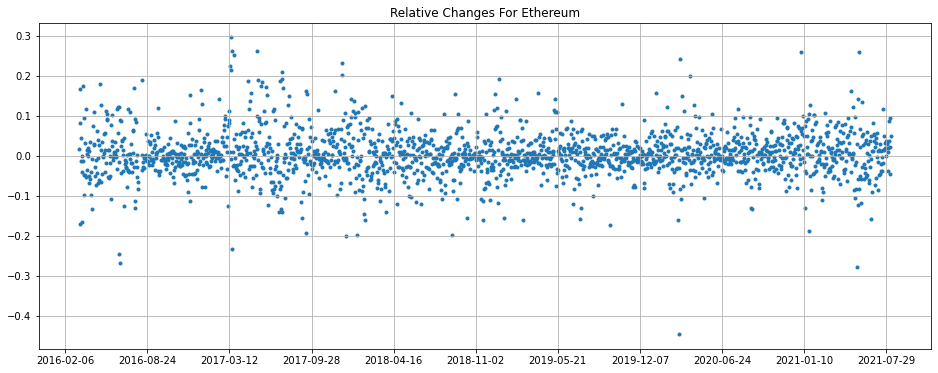

In [59]:
# plot relative changes of price
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(Eth.Date, Eth.percChange, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.title('Relative Changes For Ethereum')
plt.grid()
plt.show()

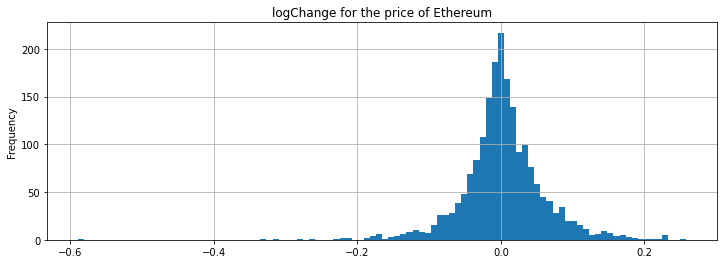

In [61]:
# distribution of log change
plt.figure(figsize=(12,4))
Eth.logChange.plot(kind='hist', bins=100)
plt.title('logChange for the price of Ethereum')
plt.grid()
plt.show()

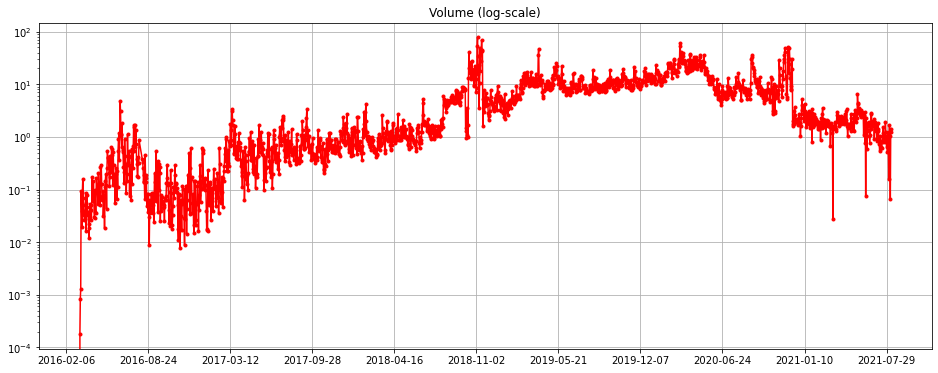

In [64]:
# plot volume development - log scale
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(Eth.Date, Eth["Vol."], marker='.', 
        color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
ax.set_yscale('log')
plt.title('Volume (log-scale)')
plt.grid()
plt.show()